# Project Overview

With all of the tweets circulating every second it is hard to tell whether the sentiment behind a specific tweet will impact a company, or a person's, brand for being viral (positive), or devastate profit because it strikes a negative tone. Capturing sentiment in language is important in these times where decisions and reactions are created and updated in seconds. But, which words actually lead to the sentiment description?

source: https://www.kaggle.com/c/tweet-sentiment-extraction/overview

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import string
import os
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
from collections import Counter
%matplotlib inline

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


# Load Data

In [2]:
# load the data files
data_dir = 'data/'
train_dataset = os.path.join(data_dir, 'train.csv')
test_dataset = os.path.join(data_dir, 'test.csv')
submission_file =os.path.join(data_dir, 'sample_submission.csv')

In [3]:
# reading the data
train = pd.read_csv(train_dataset)
test = pd.read_csv(test_dataset)
sample = pd.read_csv(submission_file)

In [4]:
# Calculating number of na values in dataframe
train.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

As indicated from the train info above, there is a single null object in the train set. We will go ahead to remove the null object.

In [5]:
# drop null value
train.dropna(inplace=True)

In [6]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [7]:
def plot_word_clouds(df_text,sentiment):
    text = " ".join(str(tmptext) for tmptext in df_text)
    text = text.lower()
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(text)
  
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title('WordCloud - ' + sentiment)
    plt.show()         

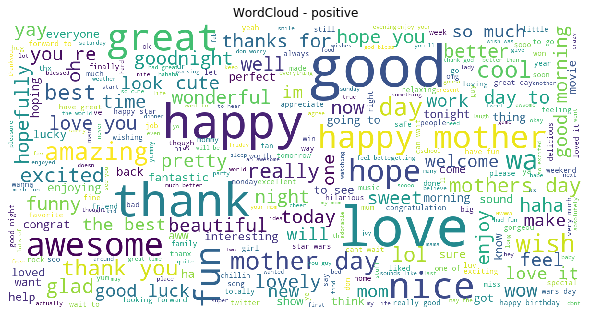

In [8]:
from wordcloud import WordCloud, STOPWORDS

# create wordcloud for positive sentiments
subtext = train[train['sentiment']=='positive']['selected_text']
stopwords = set(STOPWORDS) 
plot_word_clouds(subtext,'positive')


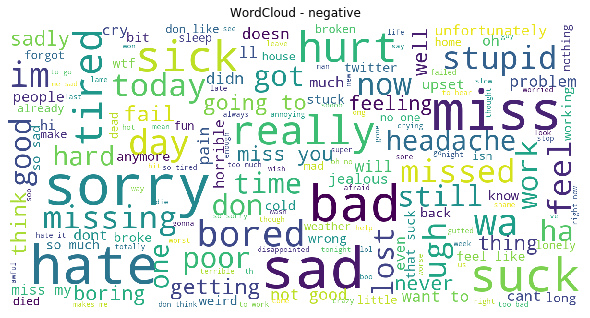

In [9]:
# create wordcloud for negative sentiment
subtext = train[train['sentiment']=='negative']['selected_text']
plot_word_clouds(subtext,'negative')

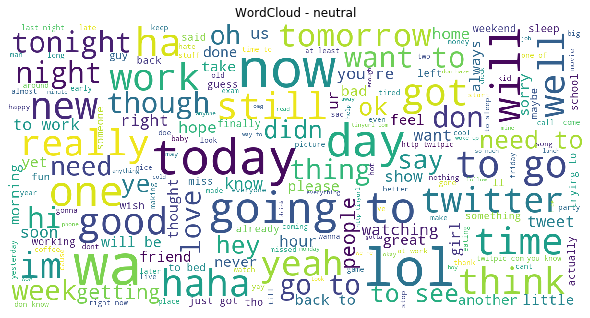

In [10]:
# create wordcloud for neutral sentiment

subtext = train[train['sentiment']=='neutral']['selected_text']
plot_word_clouds(subtext,'neutral')

# Pre-processing of data

Converting the data to lowercase, removing punctuations and numbers.

In [11]:
def clean_text(text):
    '''make text lowercase, remove punctuations, urls, words containing numbers, emoticons, etc
    '''
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) 
    text = re.sub('<.*?>+', '', text)
    
    return text

In [12]:
# clean text entries in train set
train['text'] = train['text'].apply(lambda x: clean_text(x))

# clean selected_text entries in train set
train['selected_text'] = train['selected_text'].apply(lambda x: clean_text(x))

# clean text entries in test set
test['text'] = test['text'].apply(lambda x: clean_text(x))


In [44]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative


In [13]:
from nltk.corpus import stopwords

def common_words(sentiment):
    '''displays the top words across the given sentiment category'''
    
    # make a Series object from selected_text based on given sentiment
    data = pd.Series(train.loc[train['sentiment']==sentiment, 'selected_text'])
    data = data.apply(lambda x: str(x).split())
    # remove stop words
    word = data.apply(lambda x: [word for word in x if word not in (stopwords.words('english'))])
    # make a DataFrame of the top 20 most occuring words
    top = Counter([item for sublist in word for item in sublist])
    t_list = pd.DataFrame(top.most_common(20))
    t_list.columns = ['Common_words', 'count']

    return t_list

In [14]:
# display most common words according to positive sentiment
print(common_words('positive'))

   Common_words  count
0          good    826
1         happy    730
2          love    697
3           day    456
4        thanks    439
5         great    364
6           fun    287
7          nice    267
8       mothers    259
9          hope    245
10      awesome    232
11           im    185
12        thank    180
13         like    167
14         best    154
15         wish    152
16      amazing    135
17       really    128
18       better    125
19         cool    119


In [15]:
# display most common words according to negative sentiment
print(common_words('negative'))

   Common_words  count
0            im    452
1          miss    358
2           sad    343
3         sorry    300
4           bad    246
5          hate    230
6          dont    221
7          cant    201
8          sick    166
9          like    162
10        sucks    159
11         feel    158
12        tired    144
13       really    137
14         good    127
15        bored    115
16          day    110
17        hurts    108
18         work     99
19          get     97


In [16]:
# display most common words according to neutral sentiment
print(common_words('neutral'))

   Common_words  count
0            im   1041
1           get    612
2            go    569
3           day    492
4          dont    482
5         going    472
6          work    467
7          like    445
8           got    442
9         today    427
10          lol    427
11         time    414
12         know    407
13         back    402
14          one    394
15            u    376
16          see    349
17         cant    340
18         home    335
19         want    319


In [17]:
def unique_words(sentiment):
    '''displays the top unique words across the given sentiment category'''
    
    # list of words to be exempted from the onset
    exempted = []
    for items in (train.loc[train['sentiment']!=sentiment, 'selected_text']):
        [exempted.append(i) for i in items.split()]
            
    exempted = list(set(exempted))
    
    # create series object from selected_text based on given sentiment
    data = pd.Series(train.loc[train['sentiment']==sentiment, 'selected_text'])
    
    # clean text
    data = data.apply(lambda x: str(x).split())
    word = data.apply(lambda x: [word for word in x if word not in (stopwords.words('english'))])
    words = []
    for items in word:
        [words.append(i) for i in items]
        
    # make a DataFrame of the top 20 most unique words
    count = Counter(words)
    unique = [x for x in words if x not in exempted]
    for item in list(count):
        if item not in unique:
            del count[item]
    unique_words = pd.DataFrame(count.most_common(20), columns = ['words','count'])
    
    return unique_words

In [18]:
# display most unique words according to positive sentiment
unique_words('positive')

,words,count
0,congratulations,26
1,thnx,8
2,lov,8
3,happ,7
4,talented,7
5,brilliant,7
6,appreciated,6
7,goood,6
8,amazin,5
9,mommas,5


In [19]:
# display most unique words according to negative sentiment
unique_words('negative')

,words,count
0,ache,10
1,saddest,7
2,hated,6
3,weak,6
4,suffering,6
5,rly,5
6,devastated,5
7,pissing,5
8,allergic,4
9,cramps,4


In [20]:
# display most unique words according to neutral sentiment
unique_words('neutral')

,words,count
0,hows,33
1,store,28
2,guitar,26
3,green,22
4,catching,16
5,myspace,16
6,planning,15
7,random,15
8,hrs,15
9,shop,15


In [21]:
# split train dataset into training and evaluation set
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(train, train_size = 0.8, random_state = 0)

In [22]:
print(X_train.shape)
print(X_val.shape)

(21984, 4)
(5496, 4)


### Algorithm for weight calculation:

1. For each class $j \in \{positive, neutral, negative\}$

    a. Find all the words $i$ in the tweets belonging to class $j$.

    b. Calculate $n_{i, j} =$ the number of tweets in class $j$ containing word $i$. 

    c. Let $d_j$ be the number of tweets in class $j$.  Calculate $p_{i, j} = \frac{n_{i, j}}{d_j}$, the proportion of tweets in class $j$ that conain word $i$.

    d. Let $w_{i, j} = p_{i, j} - \sum\limits_{k \neq j}p_{i, k}$ be the weights assigned to each word within each class. 
    

In [23]:
# Load training data
train_x = X_train['text']

# data based on sentiments
train_positive = X_train[X_train['sentiment'] == 'positive']
train_negative = X_train[X_train['sentiment'] == 'negative']
train_neutral = X_train[X_train['sentiment'] == 'neutral']

In [24]:
# initialize CountVectorizer model
cv = CountVectorizer(analyzer='word', 
                     max_df=0.95,
                     stop_words ='english')

# fit and transform training data 
x_vectorized = cv.fit_transform(train_x)

In [25]:
# transform data based on sentiment
x_positive = cv.transform(train_positive['text'])
x_negative = cv.transform(train_negative['text'])
x_neutral = cv.transform(train_neutral['text'])

In [26]:
#dictionary of words for all words in each sentiment category
#with their corresponding count values

def proportion_calculation(data, cv_transformed):
    '''function to calculate the proportion of each words in a category'''
    
    # dictionary of words with corresponding count values
    words_dict = {}
    
    # create dataframes of vectorized arrays and their counts
    df = pd.DataFrame(cv_transformed.toarray(), columns=cv.get_feature_names())
    
    for i in cv.get_feature_names():
        # obtain sum of values in the given class
        count_sum = df[i].sum()
        # calculate overall proportion of items in the given class
        words_dict[i] = count_sum/len(data)
     
    
    return words_dict

In [27]:
# calculate proportion values across all categories
positive = proportion_calculation(train_positive, x_positive)
negative = proportion_calculation(train_negative, x_negative)
neutral = proportion_calculation(train_neutral, x_neutral)

word_dictionary = {'positive': positive,
                    'negative': negative,
                    'neutral' : neutral}

In [28]:
word_dictionary

{'positive': {'aaa': 0.0,
  'aaaa': 0.0,
  'aaaaaaaaaaa': 0.0,
  'aaaaaaaaaamazing': 0.0001452643811737362,
  'aaaaaaaafternoon': 0.0001452643811737362,
  'aaaaaaaahhhhhhhh': 0.0,
  'aaaaaah': 0.0,
  'aaaaaalcohol': 0.0001452643811737362,
  'aaaaaawwwesome': 0.0,
  'aaaaahhhh': 0.0,
  'aaaaall': 0.0001452643811737362,
  'aaaaandnothin': 0.0,
  'aaaaarrrrggghhh': 0.0,
  'aaaaaw': 0.0,
  'aaaaawwwwwww': 0.0,
  'aaaagggessss': 0.0,
  'aaaagh': 0.0,
  'aaaah': 0.0002905287623474724,
  'aaaahh': 0.0001452643811737362,
  'aaaaiieee': 0.0001452643811737362,
  'aaaargh': 0.0,
  'aaaau': 0.0001452643811737362,
  'aaaaw': 0.0,
  'aaaawww': 0.0,
  'aaah': 0.0001452643811737362,
  'aaahaha': 0.0001452643811737362,
  'aaahhh': 0.0001452643811737362,
  'aaand': 0.0001452643811737362,
  'aaarrrgggghhh': 0.0,
  'aaarrrgh': 0.0,
  'aaaw': 0.0001452643811737362,
  'aaaww': 0.0,
  'aaawww': 0.0001452643811737362,
  'aac': 0.0,
  'aaggh': 0.0,
  'aah': 0.0001452643811737362,
  'aahhh': 0.0,
  'aahs': 0.00

In [29]:
def weight_calculation(target, cat_1, cat_2):
    adjusted_weight = {}
    for key, value in target.items():
        adjusted_weight[key] = target[key] - (cat_1[key] + cat_2[key])
        
    return adjusted_weight

In [30]:
# calculate adjusted weights across all categories
weights_positive = weight_calculation(positive, negative, neutral)
weights_negative = weight_calculation(negative, neutral, positive)
weights_neutral = weight_calculation(neutral, positive, negative)

val_weights = { 'positive': weights_positive,
                'negative': weights_negative,
                'neutral': weights_neutral }

In [31]:
val_weights

{'positive': {'aaa': -0.00011309658448314861,
  'aaaa': -0.00015979546180888463,
  'aaaaaaaaaaa': -0.00011309658448314861,
  'aaaaaaaaaamazing': 0.0001452643811737362,
  'aaaaaaaafternoon': 0.0001452643811737362,
  'aaaaaaaahhhhhhhh': -0.00011309658448314861,
  'aaaaaah': -0.00011309658448314861,
  'aaaaaalcohol': 0.0001452643811737362,
  'aaaaaawwwesome': -0.00011309658448314861,
  'aaaaahhhh': -0.00011309658448314861,
  'aaaaall': 0.0001452643811737362,
  'aaaaandnothin': -0.00011309658448314861,
  'aaaaarrrrggghhh': -0.00015979546180888463,
  'aaaaaw': -0.00011309658448314861,
  'aaaaawwwwwww': -0.00015979546180888463,
  'aaaagggessss': -0.00015979546180888463,
  'aaaagh': -0.00015979546180888463,
  'aaaah': -0.00014215874575344546,
  'aaaahh': 0.0001452643811737362,
  'aaaaiieee': 0.0001452643811737362,
  'aaaargh': -0.00011309658448314861,
  'aaaau': 0.0001452643811737362,
  'aaaaw': -0.00015979546180888463,
  'aaaawww': -0.00011309658448314861,
  'aaah': -8.092878779256103e-05,
 

### Algorithm for finding selected text: 
  
1. For every tweet:

    a. Let $j$ be the sentiment of the tweet. 

    b. If $j ==$ neutral return entire text.

    c. Otherwise, for each subset of words in the tweet, calculate $\sum\limits_{i}w_{i, j}$, where $i$ is the set of words in the tweet

   d. Return the subset of words with the largest sum, given that it exceeds some tolerance.

In [32]:
def get_selected_text(row, word_dictionary, tolerance=0):
    '''algorithm for obtaining the selected text given the text ID'''
    
    # initialize tweet and corresponding sentiment given ID
    text = row['text']
    sentiment = row['sentiment']
    
    # define dictionary of words to use depending on sentiment
    if(sentiment == 'neutral'):
        return text # return entire tweet if sentiment category is neutral
    
    elif(sentiment == 'positive'):
        word_dict = word_dictionary['positive']
    elif (sentiment == 'negative'):
        word_dict = word_dictionary['negative']
    
    selected_text = str() # obtained result from our algorithm
    score = 0
    words = text.split()
    subset = [words[i:j+1] for i in range(len(words)) for j in range (i, len(words))]
    sorted_list = sorted(subset, key=len) # sort subset of text according to length
    
    for i in range(len(subset)):
        n_sum = 0
        # calculating the sum of weights for each word in the subset of text
        for p in range(len(sorted_list[i])):
            if(sorted_list[i][p] in word_dict.keys()):
                n_sum += word_dict[sorted_list[i][p]]
                
        # update current selection if the sum is greater than the score       
        if(n_sum > score + tolerance):
            score = n_sum
            selected_text = sorted_list[i]
                
    # if no good subsets, return whole text
    if(len(selected_text) == 0):
        selected_text = words
                
            
    return ' '.join(selected_text)
    

In [33]:
def jaccard(str1, str2):
    '''jaccard score algorithm'''
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    score = float(len(c)) / ((len(a) + len(b)) - len(c))
    
    return score

In [34]:
# calculate score for validation set
def validation(df, word_dictionary):
    tolerance = 0.001
    
    df['predicted_selection'] = str()

    for index, row in df.iterrows():
        selected_text = get_selected_text(row, word_dictionary, tolerance)
        df.loc[df['textID'] == row['textID'],['predicted_selection']] = selected_text
        
    df['jaccard'] = df.apply(lambda x: jaccard(x['selected_text'], x['predicted_selection']), axis = 1)
    jaccard_score = np.mean(df['jaccard'])
    
    print('jaccard score is: {}'.format(jaccard_score))

In [35]:
pd.options.mode.chained_assignment = None  # default='warn'

In [36]:
# validation
validation(X_val, val_weights)

jaccard score is: 0.6677281696329301


As seen from above output, we obtained a jaccard score of 0.66773 on our validation set.

In [37]:
# display updated dataframe
X_val.head()

,textID,text,selected_text,sentiment,predicted_selection,jaccard
20673,3391184efc,loves the nice weather and exams,loves,positive,loves the nice,0.333333
12581,b35daf9677,okay this weather isnt cute sundress friendly ...,okay this weather isnt cute sundress friendly ...,neutral,okay this weather isnt cute sundress friendly ...,1.000000
13136,06e5249859,woo hoo congratulations,congratulations,positive,woo hoo congratulations,0.333333
14013,3cd4960670,thanks got a hold of someone there who knew...,thanks,positive,thanks,1.000000
25030,92b75314ca,got back and putting in the laundry we got in ...,got back and putting in the laundry we got in ...,neutral,got back and putting in the laundry we got in ...,1.000000


# Prediction

Since we have been able to validate our algorithm, we can go ahead to apply it to the submission file.
The following codes are similar to what was used on the training/validation test.

In [38]:
# Re-calculate word weights using entire training set.

# load dataset based on sentiments
train_positive = train[train['sentiment'] == 'positive']
train_negative = train[train['sentiment'] == 'negative']
train_neutral = train[train['sentiment'] == 'neutral']

In [39]:
# initialize CountVectorizer model
cv = CountVectorizer(analyzer='word', 
                     max_df=0.95, 
                     min_df=2, 
                     max_features=10000,
                     stop_words ='english')

# fit and transform training data 
x_vectorized = cv.fit_transform(train_x)

# transform data based on sentiment
x_positive = cv.transform(train_positive['text'])
x_negative = cv.transform(train_negative['text'])
x_neutral = cv.transform(train_neutral['text'])

In [40]:
# calculate proportion values across all categories
positive = proportion_calculation(train_positive, x_positive)
negative = proportion_calculation(train_negative, x_negative)
neutral = proportion_calculation(train_neutral, x_neutral)

# calculate adjusted weights across all categories
weights_positive = weight_calculation(positive, negative, neutral)
weights_negative = weight_calculation(negative, neutral, positive)
weights_neutral = weight_calculation(neutral, positive, negative)

weights = { 'positive': weights_positive,
            'negative': weights_negative,
            'neutral': weights_neutral }

In [41]:
weights

{'positive': {'aaaah': -0.0001139427858697759,
  'aaah': -6.338169551307698e-05,
  'aaahhh': -1.1995230301083864e-05,
  'aaaw': 2.6570629754531195e-05,
  'aaawww': -1.1995230301083864e-05,
  'aah': -0.0001139427858697759,
  'aargh': -0.00025703637064644646,
  'aaron': -0.0002818522061039084,
  'abandoned': -0.000565459206504886,
  'abandoning': -0.0003084228358584396,
  'abbey': 2.6570629754531195e-05,
  'abby': -0.00039837516112604775,
  'abiding': -0.00025703637064644646,
  'ability': -0.0007059726221291931,
  'abit': -0.00020389511113738407,
  'able': -0.004709403534523447,
  'abrams': -0.00017990465053521634,
  'abs': -1.1995230301083864e-05,
  'absolute': 0.00023304591004427873,
  'absolutely': 0.00048332762929980755,
  'absolutly': 0.0001045277247210555,
  'abt': -0.0015780998701954495,
  'abuzz': -0.0002184705105908314,
  'ac': -0.0012568564291806318,
  'academy': -0.00012676339102615395,
  'accadentally': -0.0002184705105908314,
  'accent': 2.6570629754531195e-05,
  'accept': -

Make predictions on test set and display sample file.

In [42]:
# make predictions on test set
tolerance = 0.0001
for index, row in test.iterrows():
    selected_text = get_selected_text(row, weights, tolerance)
    sample.loc[sample['textID'] == row['textID'],['selected_text']] = selected_text

In [45]:
# display results
sample.head(10)

,textID,selected_text
0,f87dea47db,last session of the day
1,96d74cb729,exciting precisely skyscrapers galore good twe...
2,eee518ae67,shame
3,01082688c6,happy
4,33987a8ee5,i like it
5,726e501993,great
6,261932614e,hates
7,afa11da83f,completely
8,e64208b4ef,and within a short time of the last clue all ...
9,37bcad24ca,what did you get my day is alright havent do...
